## **CASO 8: CLASIFICACIÓN SEGURIDAD CIBERNÉTICA**

Usted trabaja para una organización en el equipo de seguridad cibernética y cuenta con los registros de transacciones dadas en diferentes momentos. Usted quiere revisar si dichas transacciones son normales o son ataques, para lo cual decide construir un experimento de clasificación. Cuenta con 8.866 transacciones con diferentes columnas. Identifique el modelo que mejor ajuste los datos con la mejor matriz de confusión y un f1 score superior al 80%.

## Metodología ASUM-DM

1. **Entendimiento del Negocio:** La organización de seguridad cibernética busca clasificar la procedencia de las transacciones entre normales o ataques.

2. **Enfoque Analítico:** Diseñar un experimento que permita clasificar los registros de transacciones

3. **Requerimiento de Datos:** Registro de transacciones de la organización

4. **Recolección de Datos:**

    <img src="../Datasets//Datos_CiberseguridadCibernética.png" alt="Datos EB" width="500" />

5. **Entendimiento de Datos:**
    - Identificar datos nulos
    - Exploración univariada de los datos 
    - Exploración multivariada de los datos
    - Identificación de correlación y multicolinealidad

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('../Datasets/datos_caso_8.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8866 entries, 0 to 8865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamp       8866 non-null   object
 1   Source_IP       8866 non-null   object
 2   Destination_IP  8866 non-null   object
 3   Port            8866 non-null   int64 
 4   Request_Type    8866 non-null   object
 5   Protocol        8866 non-null   object
 6   Payload_Size    8866 non-null   int64 
 7   User_Agent      8866 non-null   object
 8   Status          8866 non-null   object
 9   Intrusion       8866 non-null   int64 
 10  Scan_Type       8866 non-null   object
dtypes: int64(3), object(8)
memory usage: 762.1+ KB


In [9]:
data

,Timestamp,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,192.168.54.167,220.159.139.17,443,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,192.168.193.254,201.83.205.167,80,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,192.168.91.17,211.0.177.164,21,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,192.168.108.75,187.49.21.67,22,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,192.168.245.254,189.62.16.12,53,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,166.225.57.211,202.34.154.193,135,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,192.168.255.79,2.236.94.56,21,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,192.168.174.115,206.61.199.249,22,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,192.168.68.65,7.132.69.36,443,DNS,TCP,2792,nmap/7.80,Success,0,Normal


### Identificación de Datos Nulos

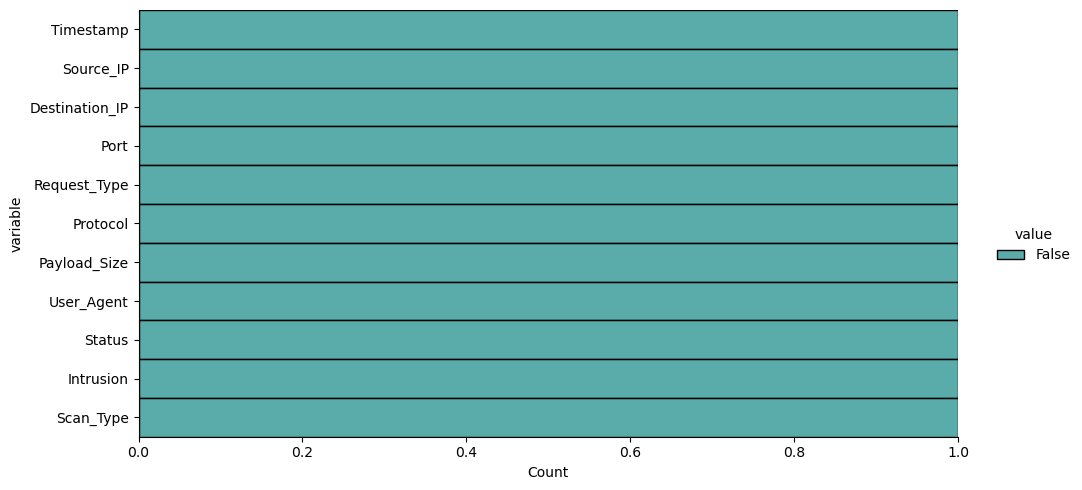

In [10]:
data.isnull().melt().pipe(lambda df: sns.displot(data=df, y = 'variable', palette='viridis', hue='value', multiple='fill', aspect=2))
plt.show()

### Exploración Univariada de los Datos

#### HISTOGRAMAS DE FRECUENCIA

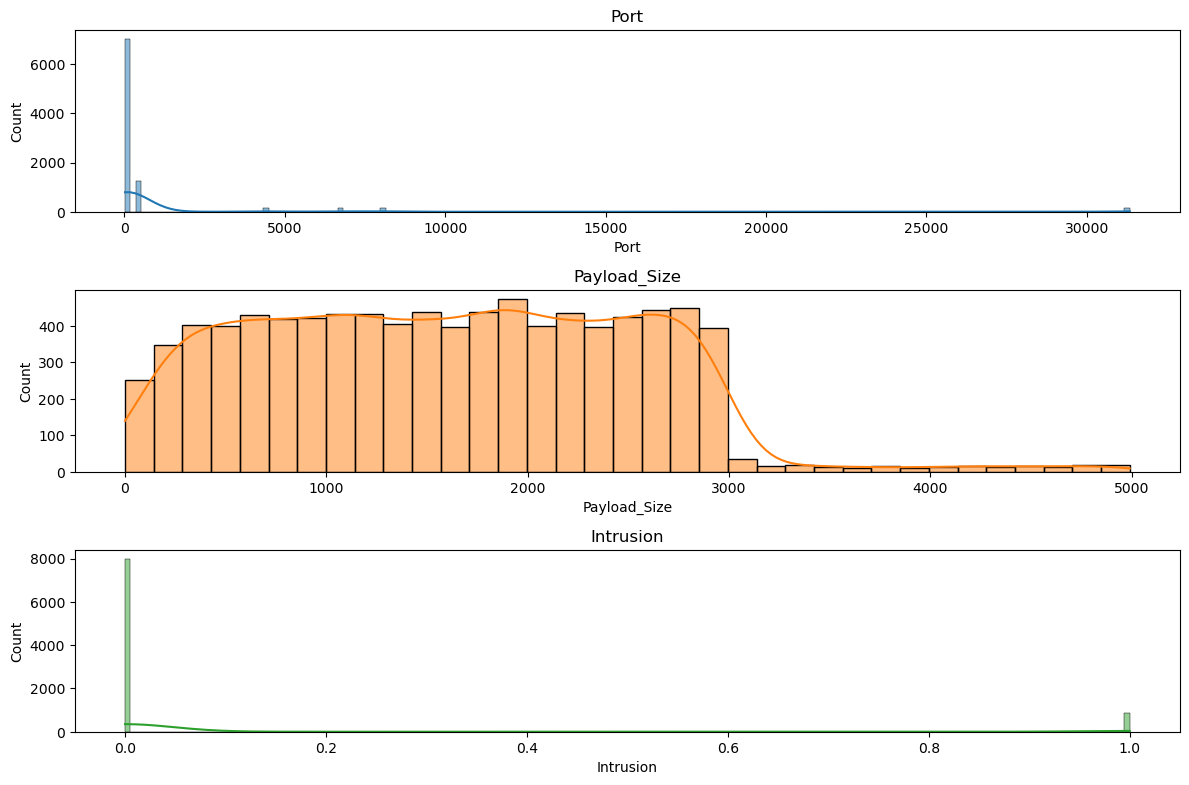

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
ax = ax.flat
num_col = data.select_dtypes(include=['int64', 'float64']).columns # SOLO VAMOS A GRAFICAR VARIABLES NUMÉRICAS
for i, col in enumerate(num_col):
    sns.histplot(
        data = data,
        x = col,
        kde = True,
        color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'],
        ax = ax[i]
    )
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

**ANÁLISIS**

Las 3 variables numéricas tienen un comportamiento natural con respecto al significado de cada una, se observa en Intrusion (Transacción maliciosa o no) una mayor frecuencia de datos en 0 lo cuál es positivo al definir que hay una mayor cantidad de transacciones normales

#### GRÁFICOS DE TORTA

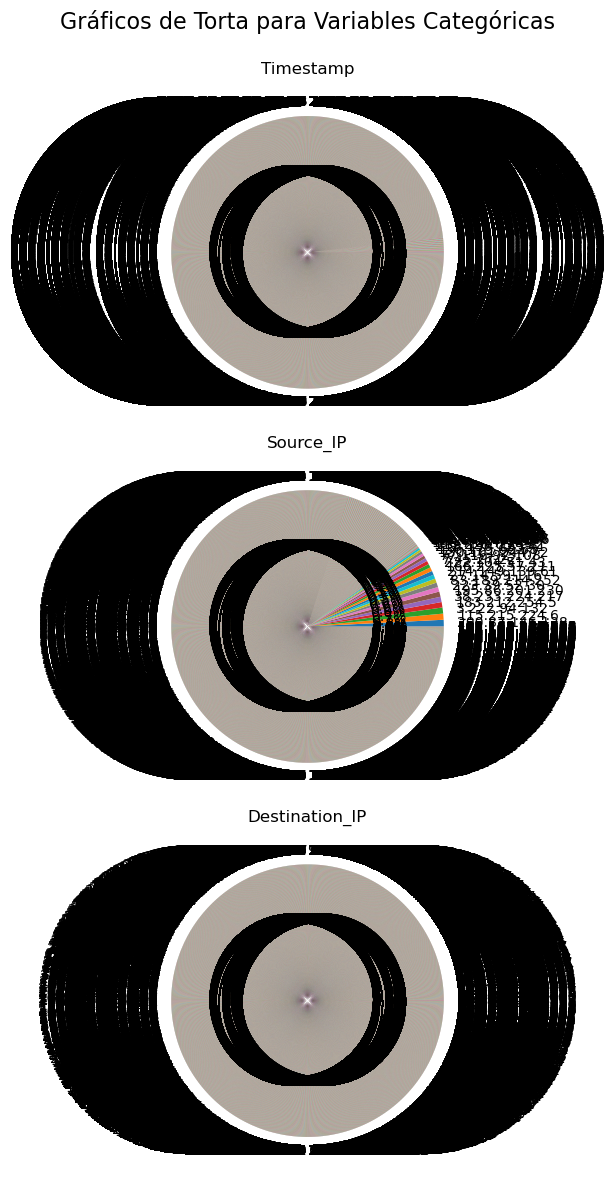

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Request_Type', 'Protocol', 'User_Agent', 'Status', 'Scan_Type'])
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
           labels = data[col].value_counts().index,
           autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

- Timestamp corresponde a las fechas y horas de la transacción, se podría hacer una conversión a Años o Meses para manejar los datos de esa manera
- Con respecto a Source_IP y Destination_IP no hay mucho que hacer debido a la diferenciación que tiene cada una y el poco impacto que generan sobre el Modelo

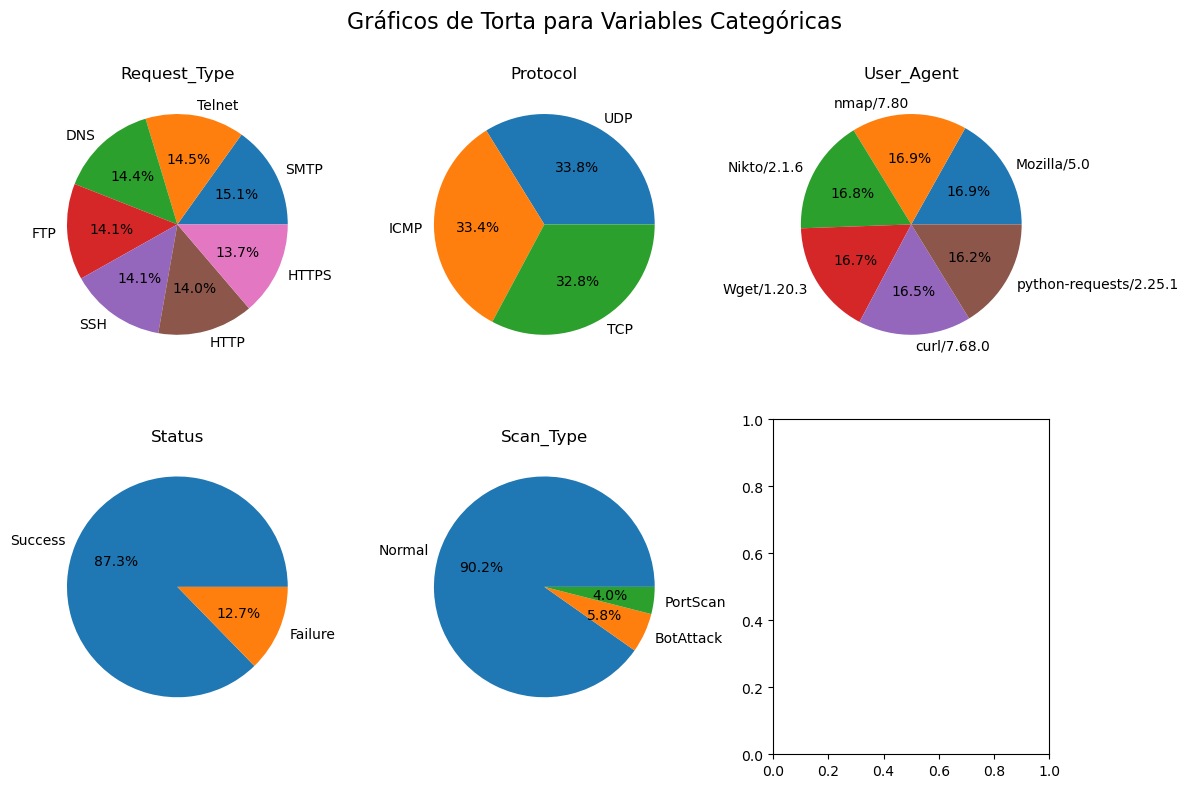

In [13]:
fig, ax = plt.subplots(2 , 3 , figsize=(12,8))
ax =ax.flat
cat_col = data.select_dtypes(include='object').columns
cat_col = cat_col.drop(['Timestamp', 'Source_IP', 'Destination_IP'])  # Excluir columnas no categóricas
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(),
            labels = data[col].value_counts().index,
            autopct = '%.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Gráficos de Torta para Variables Categóricas', fontsize=16)
plt.show()

**ANÁLISIS**

Las variables `Status` y `Scan_Type` se encuentran desbalanceadas, ambas poseen dos valores con más del 80%

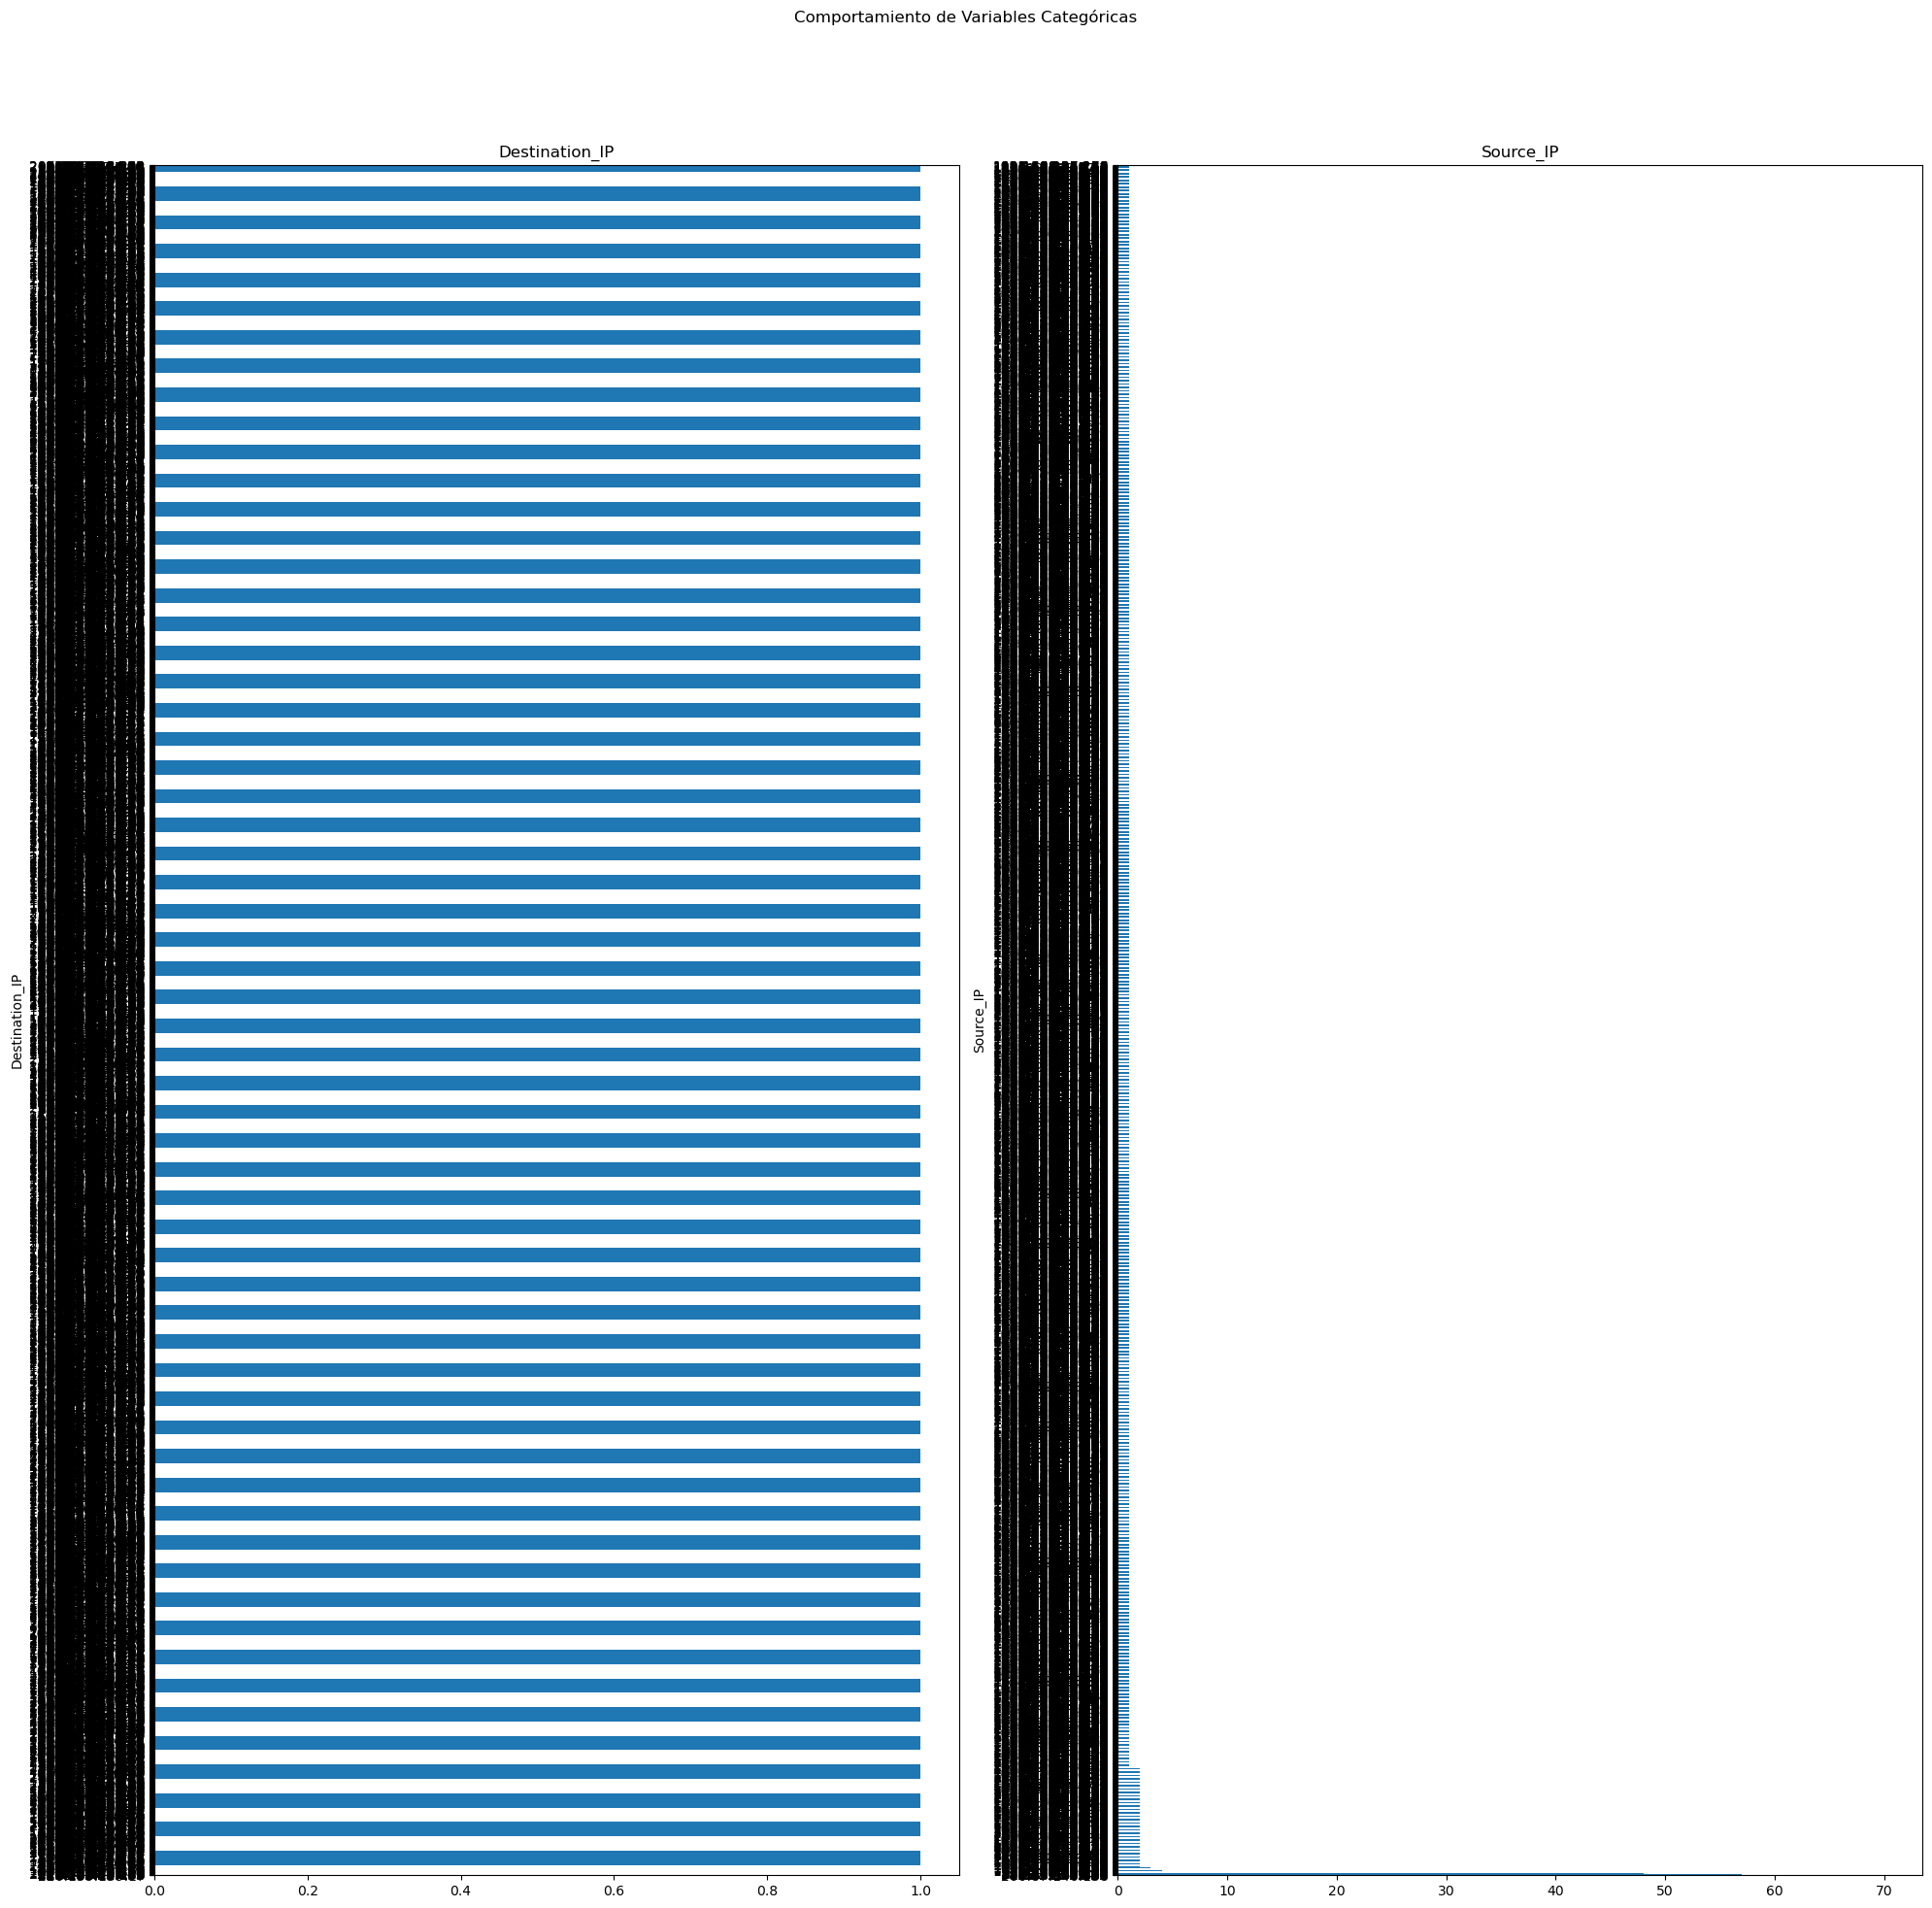

In [14]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Destination_IP', 'Source_IP']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

## Preparación de los Datos

### Limpieza de los Datos

In [39]:
data_mod = data.drop(columns=['Port', 'Source_IP', 'Destination_IP'])
data_mod

,Timestamp,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,2025-06-06 06:04:08,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,2025-06-04 15:20:59,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,2025-06-03 07:23:49,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,2025-06-03 11:35:42,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,2025-06-05 06:09:02,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...,...
8861,2025-06-04 22:16:23,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,2025-06-05 14:43:42,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,2025-06-01 23:27:15,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,2025-06-01 00:26:36,DNS,TCP,2792,nmap/7.80,Success,0,Normal


<Axes: ylabel='Days,Months'>

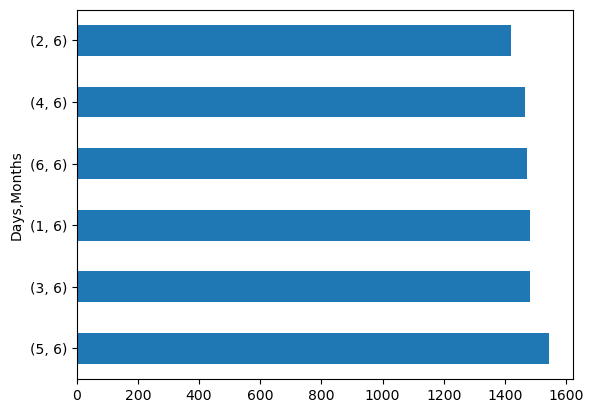

In [40]:
data_mod['Timestamp'] = pd.to_datetime(data_mod['Timestamp'], errors='raise')
data_mod['Months'] = data_mod['Timestamp'].dt.month
data_mod['Days'] = data_mod['Timestamp'].dt.day
data_mod[['Days', 'Months']].value_counts().plot.barh()

In [41]:
data_clean = data_mod.drop(columns=['Timestamp', 'Days', 'Months'])
data_clean

,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,SSH,ICMP,2954,Mozilla/5.0,Success,0,Normal
1,FTP,UDP,206,Wget/1.20.3,Success,0,Normal
2,SSH,ICMP,977,nmap/7.80,Success,0,Normal
3,HTTP,TCP,521,curl/7.68.0,Success,0,Normal
4,Telnet,TCP,251,Wget/1.20.3,Success,0,Normal
...,...,...,...,...,...,...,...
8861,DNS,ICMP,1391,Nikto/2.1.6,Failure,1,BotAttack
8862,SSH,TCP,2272,curl/7.68.0,Success,0,Normal
8863,SSH,TCP,2753,python-requests/2.25.1,Success,0,Normal
8864,DNS,TCP,2792,nmap/7.80,Success,0,Normal


In [42]:
data_status = data_clean.drop(columns=['Scan_Type'])
data_scan = data_clean.drop(columns=['Status'])

### Balanceo

#### Y: Status

In [45]:
data_status_success = data_status[data_status['Status'] == 'Success']
data_status_failure = data_status[data_status['Status'] == 'Failure']

print(f"Success: {data_status_success.shape[0]}")
print(f"Failure: {data_status_failure.shape[0]}")

Success: 7739
Failure: 1127


In [46]:
data_status_failure_re = data_status_failure.sample(data_status_success.shape[0], replace=True)
data_status = pd.concat([data_status_success, data_status_failure_re])
data_status.reset_index(drop=True, inplace=True)
data_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request_Type  15478 non-null  object
 1   Protocol      15478 non-null  object
 2   Payload_Size  15478 non-null  int64 
 3   User_Agent    15478 non-null  object
 4   Status        15478 non-null  object
 5   Intrusion     15478 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 725.7+ KB


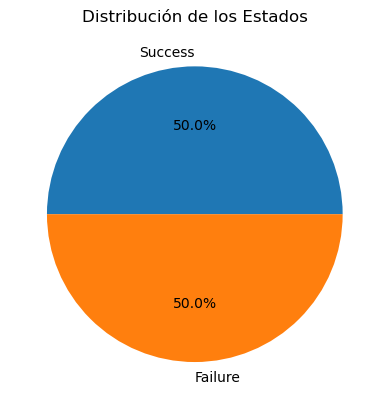

In [47]:
plt.pie(data_status["Status"].value_counts(), labels=data_status["Status"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

#### Y: Scan_Type

In [56]:
data_scan_normal = data_scan[data_scan["Scan_Type"] == "Normal"]
data_scan_bot = data_scan[data_scan["Scan_Type"] == "BotAttack"]
data_scan_port = data_scan[data_scan["Scan_Type"] == "PortScan"]

print(f"Normal: {data_scan_normal.shape[0]}")
print(f"BotAttack: {data_scan_bot.shape[0]}")
print(f"PortScan: {data_scan_port.shape[0]}")

Normal: 8000
BotAttack: 514
PortScan: 352


In [57]:
data_scan_bot_re = data_scan_bot.sample(data_scan_normal.shape[0], replace=True)
data_scan_port_re = data_scan_port.sample(data_scan_normal.shape[0], replace=True)

data_scan = pd.concat([data_scan_normal, data_scan_bot_re, data_scan_port_re])
data_scan.reset_index(drop=True, inplace=True)
data_scan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Request_Type  24000 non-null  object
 1   Protocol      24000 non-null  object
 2   Payload_Size  24000 non-null  int64 
 3   User_Agent    24000 non-null  object
 4   Intrusion     24000 non-null  int64 
 5   Scan_Type     24000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


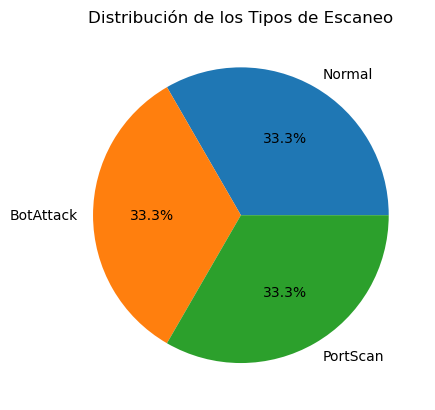

In [59]:
plt.pie(data_scan["Scan_Type"].value_counts(), labels=data_scan["Scan_Type"].value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Tipos de Escaneo")
plt.show()

### Transformación de Datos

In [65]:
X = data_status.drop(columns=['Status'])
y = data_status['Status']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (15478, 5)
y shape: (15478,)


In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns
cat_col = X.select_dtypes(include='object').columns


preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_col),
    ('cat', OneHotEncoder(sparse_output=True), cat_col)],
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 Index(['Payload_Size', 'Intrusion'], dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Request_Type', 'Protocol', 'User_Agent'], dtype='object'))])

In [139]:
X_pre = preprocessor.fit_transform(X)
cod_cat = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
labels = np.concatenate((num_col, cod_cat))
X_pro = pd.DataFrame.sparse.from_spmatrix(X_pre, columns=labels)
X_pro

,Payload_Size,Intrusion,Request_Type_DNS,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_ICMP,Protocol_TCP,Protocol_UDP,User_Agent_Mozilla/5.0,User_Agent_Nikto/2.1.6,User_Agent_Wget/1.20.3,User_Agent_curl/7.68.0,User_Agent_nmap/7.80,User_Agent_python-requests/2.25.1
0,0.591865,0,0,0,0,0,0,1.0,0,1.0,0,0,1.0,0,0,0,0,0
1,0.041274,0,0,1.0,0,0,0,0,0,0,0,1.0,0,0,1.0,0,0,0
2,0.195752,0,0,0,0,0,0,1.0,0,1.0,0,0,0,0,0,0,1.0,0
3,0.104388,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,1.0,0,0
4,0.050291,0,0,0,0,0,0,0,1.0,0,1.0,0,0,0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.532759,0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0,0,1.0
15474,0.132038,0,0,0,0,0,1.0,0,0,1.0,0,0,0,0,0,0,1.0,0
15475,0.585855,1.0,0,0,0,0,0,1.0,0,1.0,0,0,0,0,0,0,0,1.0
15476,0.460228,1.0,0,0,1.0,0,0,0,0,1.0,0,0,0,0,1.0,0,0,0


### Conjunto de Entrenamiento

In [74]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.9, random_state=123)

print(f'El Tamaño de X_train es: {X_train.shape}')
print(f'El Tamaño de X_test es: {X_test.shape}')
print(f'El Tamaño de y_train es: {y_train.shape}')
print(f'El Tamaño de y_test es: {y_test.shape}')

El Tamaño de X_train es: (13930, 18)
El Tamaño de X_test es: (1548, 18)
El Tamaño de y_train es: (13930,)
El Tamaño de y_test es: (1548,)


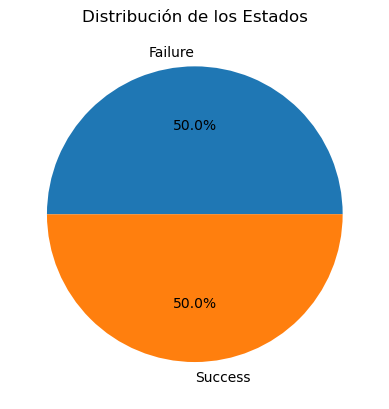

In [141]:
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

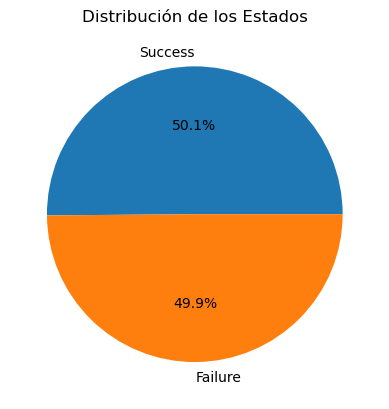

In [142]:
plt.pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
plt.title("Distribución de los Estados")
plt.show()

## Modelos

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### Regresión Logística

In [98]:
from sklearn.linear_model import LogisticRegression

In [143]:
modelo_1 = LogisticRegression(solver='saga', random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='saga'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_weighted')

In [144]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']), 
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])],
                       axis=1)
validation.sort_values(by='accuracy', ascending=False)

,C,penalty,accuracy
1,0.0001,l2,0.809425
3,0.0010,l1,0.809425
4,0.0010,l2,0.809425
6,0.0100,l1,0.809425
7,0.0100,l2,0.809425
9,0.1000,l1,0.809425
10,0.1000,l2,0.809425
12,1.0000,l1,0.809425
13,1.0000,l2,0.809425
15,10.0000,l1,0.809425


In [145]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

LogisticRegression(C=0.0001, random_state=123, solver='saga')

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       0.97      0.65      0.78      6967
     Success       0.74      0.98      0.84      6963

    accuracy                           0.81     13930
   macro avg       0.85      0.81      0.81     13930
weighted avg       0.85      0.81      0.81     13930

Matriz de Confusion


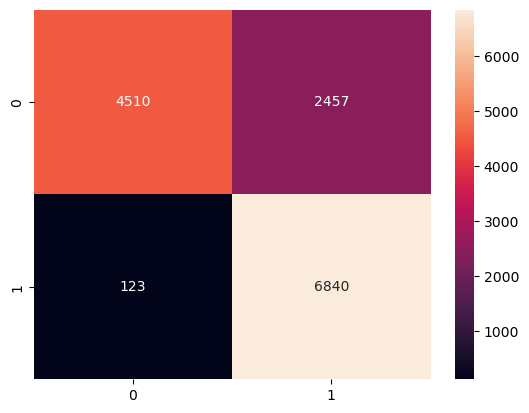

In [146]:
y_pred_1_train = modelo_1_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_1_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.98      0.66      0.79       772
     Success       0.75      0.99      0.85       776

    accuracy                           0.82      1548
   macro avg       0.86      0.82      0.82      1548
weighted avg       0.86      0.82      0.82      1548

Matriz de Confusion


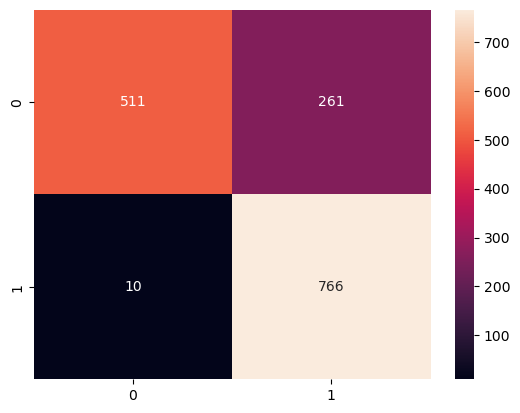

In [147]:
y_pred_1_test = modelo_1_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_1_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_1_test), annot=True, fmt='d')
plt.show()

### K Vecinos Mas Cercanos

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37], "p": [1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 17, 21, 37],
                         'p': [1, 2]},
             scoring='f1_weighted')

In [149]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1_weighted'])],
                        axis=1)
validation

,n_neighbors,p,f1_weighted
0,3,1,0.921126
1,3,2,0.921053
2,5,1,0.889688
3,5,2,0.889468
4,7,1,0.860295
5,7,2,0.860148
6,9,1,0.837971
7,9,2,0.837972
8,11,1,0.826392
9,11,2,0.826464


In [109]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

KNeighborsClassifier(n_neighbors=3, p=1)

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       0.93      1.00      0.97      6967
     Success       1.00      0.93      0.96      6963

    accuracy                           0.96     13930
   macro avg       0.97      0.96      0.96     13930
weighted avg       0.97      0.96      0.96     13930

Matriz de Confusion


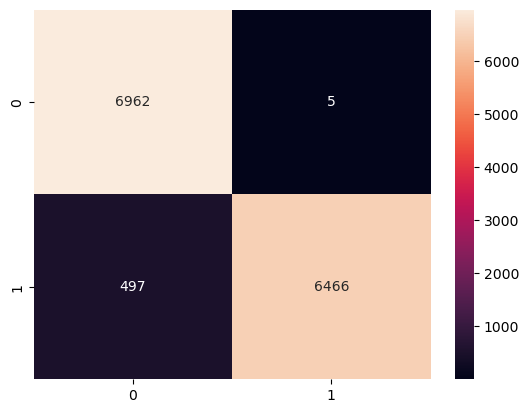

In [113]:
y_pred_2_train = modelo_2_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_2_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.89      0.99      0.94       772
     Success       0.99      0.88      0.93       776

    accuracy                           0.94      1548
   macro avg       0.94      0.94      0.94      1548
weighted avg       0.94      0.94      0.94      1548

Matriz de Confusion


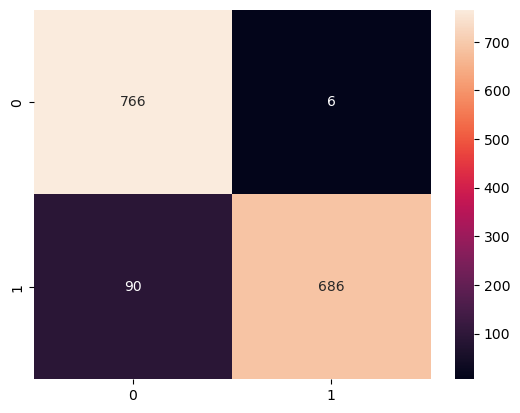

In [114]:
y_pred_2_test = modelo_2_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_2_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

### Máquinas de Soporte Vectorial

In [115]:
from sklearn.svm import SVC

In [ ]:
modelo_3 = SVC(random_state=123)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[2, 3, 4]}
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)

ValueError: 
All the 480 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/loperatomas410/anaconda3/envs/data/lib/python3.13/site-packages/sklearn/svm/_base.py", line 246, in fit
    X_var = (X.multiply(X)).mean() - (X.mean()) ** 2 if sparse else X.var()
                                                                    ^^^^^
AttributeError: 'csr_matrix' object has no attribute 'var'


### Árboles de Decisión

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [133]:
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid = {'criterion': ['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 5, 10, 15, 20],
'min_samples_split': [2, 3, 4]}
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5, scoring="f1_weighted")
clf_4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['log_loss', 'gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1_weighted')

In [134]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']), 
                        pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])],
                       axis=1)
validation.sort_values(by='f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
0,log_loss,NaN,NaN,2,0.957291
150,entropy,NaN,NaN,2,0.957291
1,log_loss,NaN,NaN,3,0.956281
151,entropy,NaN,NaN,3,0.956281
152,entropy,NaN,NaN,4,0.955782
...,...,...,...,...,...
95,gini,5.0,5.0,4,0.809900
108,gini,10.0,5.0,2,0.809900
109,gini,10.0,5.0,3,0.809900
123,gini,15.0,5.0,2,0.809900


Profundidad del árbol: 51
 Número de hojas: 1051


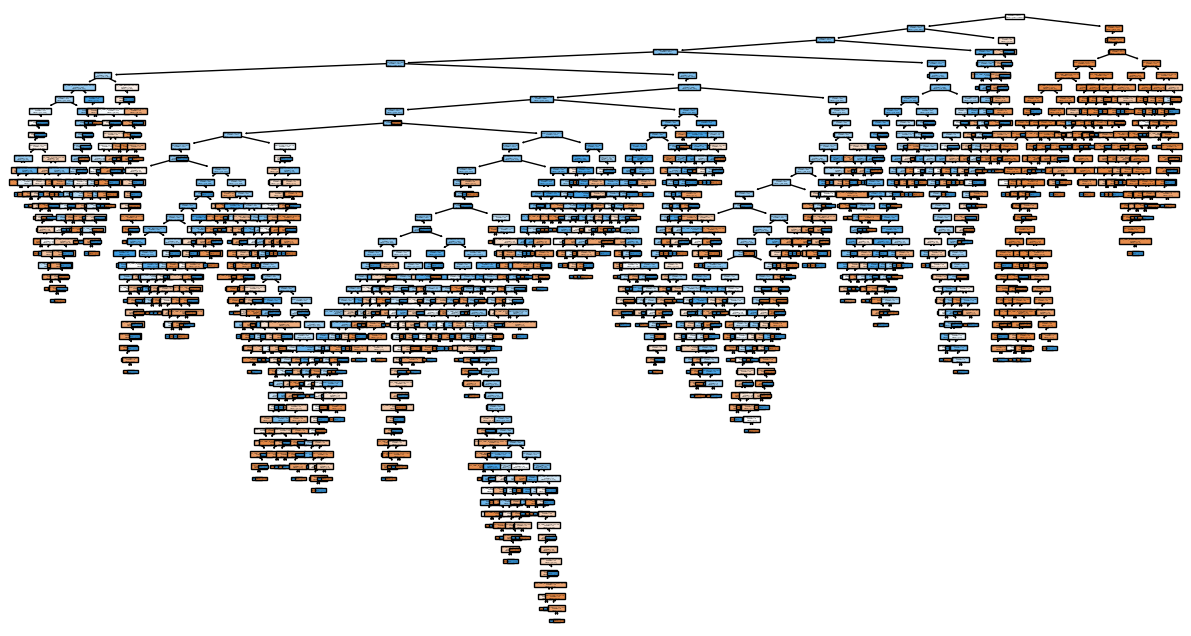

In [135]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f"Profundidad del árbol: {modelo_4_final.get_depth()}\n Número de hojas: {modelo_4_final.get_n_leaves()}")
plot = plot_tree(modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de Entrenamiento
              precision    recall  f1-score   support

     Failure       1.00      1.00      1.00      6967
     Success       1.00      1.00      1.00      6963

    accuracy                           1.00     13930
   macro avg       1.00      1.00      1.00     13930
weighted avg       1.00      1.00      1.00     13930

Matriz de Confusion


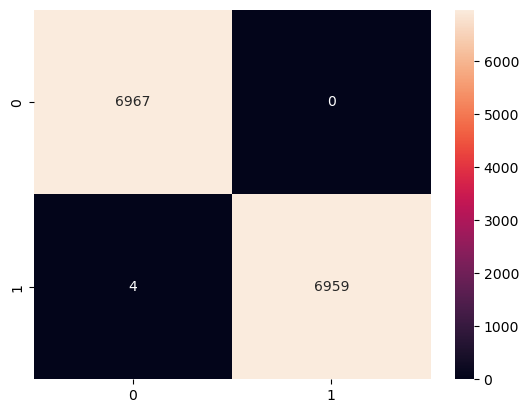

In [136]:
y_pred_4_train = modelo_4_final.predict(X_train)
print("Metricas de Entrenamiento")
print(classification_report(y_train, y_pred_4_train))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de Prueba
              precision    recall  f1-score   support

     Failure       0.93      1.00      0.96       772
     Success       1.00      0.93      0.96       776

    accuracy                           0.96      1548
   macro avg       0.97      0.96      0.96      1548
weighted avg       0.97      0.96      0.96      1548

Matriz de Confusion


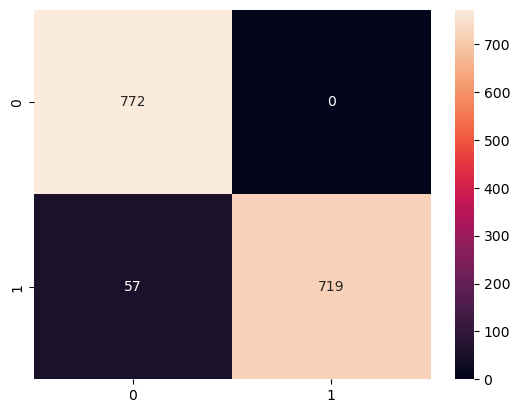

In [137]:
y_pred_4_test = modelo_4_final.predict(X_test)
print("Metricas de Prueba")
print(classification_report(y_test, y_pred_4_test))
print("Matriz de Confusion")
sns.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()